<a href="https://colab.research.google.com/github/Kuldeep995/Machine_Learning/blob/master/1801093MLassignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import math
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df)
data = df.to_numpy()
classes = iris.target

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


Implement a self-organizing feature map on IRIS data for clustering purpose.

In [ ]:
def cluster_SOM(x, map, h, w):
  pattern_arr = np.tile(x, (h ,w, 1))
  Eucli_MAP = np.linalg.norm(pattern_arr - map, axis=2)
  BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
  return BMU

def SOM_scratch(X,map_height,map_width,features,learning_rate0 = 0.1,total_epochs = 500):
  radius0 = max(map_width,map_height)/2

  MAP = np.random.uniform(size=(map_height,map_width,features))
  prev_MAP = np.zeros((map_height,map_width,features))

  radius=radius0
  learning_rate = learning_rate0

  convergence = [1]
  e_converge=0.001
  flag = 0

  for epoch in range(total_epochs):
    shuffle = np.random.randint(len(data), size=len(data))

    for k in range(len(data)):
      J = np.linalg.norm(MAP - prev_MAP)

      if  J <= e_converge:
        flag=1
        break    
      else:
        pattern = data[shuffle[k]]
        BMU = cluster_SOM(pattern,MAP,map_height,map_width)
        prev_MAP = np.copy(MAP)
        
        for i in range(map_height):
          for j in range(map_width):
            distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
            if distance <= radius:
              MAP[i][j] += learning_rate*(pattern-MAP[i][j])
        
        learning_rate = learning_rate0*math.exp(-epoch/total_epochs)
        radius = radius0*math.exp(-epoch/total_epochs)
    
    convergence.append(J)
    
    if flag==1:
      break

  return MAP

In [ ]:
m_h ,m_w, f = 7,7,4
MAP_7x7 = SOM_scratch(data,m_h ,m_w, f)

Red = Iris-Setosa
Blue = Iris-Virginica
Green = Iris-Versicolor


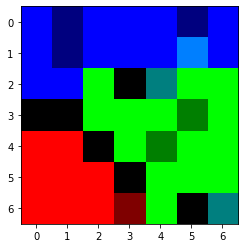

In [ ]:
BMU = np.zeros([2],dtype=np.int32)
result_map = np.zeros([m_h ,m_w,3],dtype=np.float32)

i=0
for pattern in data:
    BMU = cluster_SOM(pattern,MAP_7x7,m_h,m_w)
    x = BMU[0]
    y = BMU[1]
    if classes[i] == 0:
        if result_map[x][y][0] <= 0.5:
            result_map[x][y] += np.asarray([0.5,0,0])
    elif classes[i] == 1:
        if result_map[x][y][1] <= 0.5:
            result_map[x][y] += np.asarray([0,0.5,0])
    elif classes[i] == 2:
        if result_map[x][y][2] <= 0.5:
            result_map[x][y] += np.asarray([0,0,0.5])
    i+=1
result_map = np.flip(result_map,0)

print("Red = Iris-Setosa")
print("Blue = Iris-Virginica")
print("Green = Iris-Versicolor")
plt.imshow(result_map, interpolation='nearest')
plt.show()

Find the Silhouette Coefficient of the clusters.

In [ ]:
m_h ,m_w, f = 1,3,4
MAP_1x3 = SOM_scratch(data,m_h ,m_w, f)
winner_coordinates = np.array([cluster_SOM(x,MAP_1x3,m_h,m_w) for x in data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, (m_h, m_w))
cluster_index

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

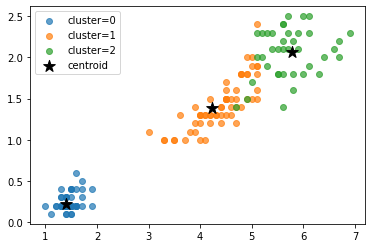

In [ ]:
points=[]
for i in range(m_h):
  for j in range(m_w):
    points.append(MAP_1x3[i][j])
centroid_self = pd.DataFrame(points)

for c in np.unique(cluster_index):
  plt.scatter(data[cluster_index == c, 2], data[cluster_index == c, 3], label='cluster='+str(c), alpha=.7)

plt.scatter(centroid_self[2], centroid_self[3], marker='*', s=150, color='k', label='centroid')

plt.legend()
plt.show()

In [ ]:
silhouette_avg_self = silhouette_score(data, cluster_index)
print("From Scratch implementation - Silhoutte score:",silhouette_avg_self)

From Scratch implementation - Silhoutte score: 0.5511916046195916


Repeat the same experiment (as in Question 1) using the inbuilt function.

In [ ]:
!pip install minisom
from minisom import MiniSom

  Created wheel for minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=ad2a5f8c3d2cad428b202334a68e6b85e2893d7b69a85b5e64688c070e87efb0
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built minisom


In [ ]:
m_h ,m_w, f = 7,7,4
som_7x7 = MiniSom(m_h ,m_w, f, sigma=0.9, learning_rate=0.9)
som_7x7.random_weights_init(data)
som_7x7.train_random(data,500,verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.2727755471124668


In [ ]:
winner_coordinates = np.array([som_7x7.winner(x) for x in data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, (m_h ,m_w))

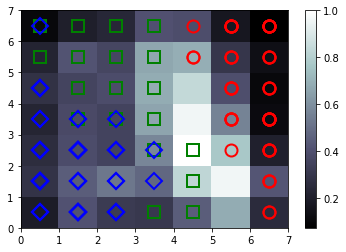

In [ ]:
from pylab import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som_7x7.distance_map().T)
colorbar()
t = classes
markers = ['o','s','D']
colors = ['r','g','b']
for cnt,xx in enumerate(data):
  w = som_7x7.winner(xx)
  plot(w[0]+.5,w[1]+.5,markers[t[cnt]],markerfacecolor='None',markeredgecolor=colors[t[cnt]],markersize=12,markeredgewidth=2)

show()

Find the Silhouette Coefficient of the clusters.

In [ ]:
m_h ,m_w, f = 1,3,4
som_1x3 = MiniSom(m_h ,m_w, f, sigma=0.5, learning_rate=0.9)
som_1x3.random_weights_init(data)
som_1x3.train_random(data,500,verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.6900749824744478


In [ ]:
winner_coordinates = np.array([som_1x3.winner(x) for x in data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, (m_h ,m_w))

In [ ]:
cluster_index

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

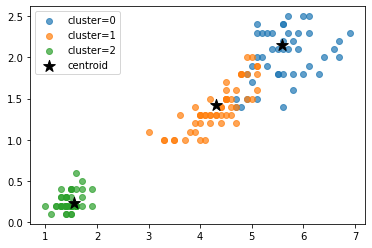

In [ ]:
for c in np.unique(cluster_index):
  plt.scatter(data[cluster_index == c, 2], data[cluster_index == c, 3], label='cluster='+str(c), alpha=.7)

for centroid in som_1x3.get_weights():
  plt.scatter(centroid[:, 2], centroid[:, 3], marker='*', s=150, color='k', label='centroid')

plt.legend()
plt.show()

In [ ]:
silhouette_avg_lib = silhouette_score(data, cluster_index)
print("Library implementation - Silhoutte score:",silhouette_avg_lib)

Library implementation - Silhoutte score: 0.5364780504069102


Compare the accuracy using Silhouette Coefficient of Question: 1&2 with the k-means algorithm from the previous assignment.

In [ ]:
m=data.shape[0]
n=data.shape[1]

def k_means(X,K,n_iter):
  centroids = []
  for k in range(K):
    centroids.append(X[random.randint(0,m-1)])

  for i in range(n_iter):
    euclid = []
    cent = {}

    for k in range(K):
      dist = np.sqrt(np.sum((X-centroids[k])**2,axis=1))
      euclid.append(dist)

    minimum = np.argmin(euclid,axis=0)

    for k in range(m):
      if minimum[k] not in cent:
        cent[minimum[k]] = []
      cent[minimum[k]].append(X[k])
      
    for k in cent:
      centroids[k] = np.mean(cent[k],axis=0)

  return centroids, cent, minimum

Centroid, Alloted, Y_pred = k_means(data,3,500)

silhouette_avg_kmeans = silhouette_score(data, Y_pred)
print("K-means implementation - Silhoutte score:",silhouette_avg_kmeans)

K-means implementation - Silhoutte score: 0.5185675688773275
